[-1.74969964  1.39775205  0.35316766] [1.43033458 3.04876926 0.3531256 ]


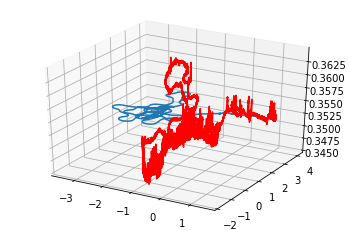

,%time,field.header.seq,field.header.stamp,field.header.frame_id,field.child_frame_id,field.transform.translation.x,field.transform.translation.y,field.transform.translation.z,field.transform.rotation.x,field.transform.rotation.y,field.transform.rotation.z,field.transform.rotation.w
1,1548945507431154226,139820,1548945507418793289,/world,vicon/aims_2/aims_2,1.430314,3.048780,0.353145,0.062110,-0.064076,0.136378,0.986629
2,1548945507436718522,139821,1548945507423786073,/world,vicon/aims_2/aims_2,1.430325,3.048785,0.353132,0.062287,-0.063218,0.136223,0.986695
3,1548945507440571777,139822,1548945507428804480,/world,vicon/aims_2/aims_2,1.430278,3.048818,0.353226,0.062774,-0.063656,0.136459,0.986603
4,1548945507445559448,139823,1548945507433783504,/world,vicon/aims_2/aims_2,1.430297,3.048795,0.353184,0.062186,-0.063249,0.136178,0.986706
5,1548945507452849983,139824,1548945507438797416,/world,vicon/aims_2/aims_2,1.430308,3.048778,0.353153,0.062367,-0.063290,0.136270,0.986679


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import scipy.ndimage.filters as filt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

odom_df = pd.read_csv('../group1/odom.csv')
vicon_df = pd.read_csv("../group1/vicon.csv").iloc[1:]
odom_shift = [np.mean(odom_df.iloc[:5,5]) - np.mean(vicon_df.iloc[:5,5]),
             np.mean(odom_df.iloc[:5,6]) - np.mean(vicon_df.iloc[:5,6]),
             np.mean(odom_df.iloc[:5,7]) - np.mean(vicon_df.iloc[:5,7])]

new_odom_df = odom_df
new_odom_df.iloc[:,5] = odom_df.iloc[:,5]-odom_shift[0]
new_odom_df.iloc[:,6] = odom_df.iloc[:,6]-odom_shift[1]
new_odom_df.iloc[:,7] = odom_df.iloc[:,7]-odom_shift[2]

v1 = odom_df.iloc[:,5:8].values
v2 = vicon_df.iloc[:,5:8].values
idx = 5000
print(v1[5000],v2[5000])
ax.plot(odom_df.iloc[:,5],odom_df.iloc[:,6],odom_df.iloc[:,7])
sigma = 5
ax.plot(vicon_df.iloc[:,5],vicon_df.iloc[:,6],vicon_df.iloc[:,7],c='r')


plt.show()
odom_df.head()
vicon_df.head()


In [20]:
# plt.plot(vicon_df.iloc[:,5],vicon_df.iloc[:,6])
# plt.plot(odom_df.iloc[:,5],odom_df.iloc[:,6])
# v1 = [vicon_df.iloc[:,5],vicon_df.iloc[:,6],np.zeros_like(vicon_df.iloc[:,5])]
# v2 = [odom_df.iloc[:,5],odom_df.iloc[:,6],np.zeros_like(odom_df.iloc[:,5])]
# print(np.array(v1).shape)

# v1 = np.array(v1) - np.array(v1)[:,0].reshape(-1,1)
# v2 = np.array(v2) - np.array(v2)[:,0].reshape(-1,1)

v1 = [vicon_df.iloc[:,5],vicon_df.iloc[:,6],vicon_df.iloc[:,7]]
v2 = [odom_df.iloc[:,5],odom_df.iloc[:,6],odom_df.iloc[:,7]]
print(np.array(v1).shape)

v1 = np.array(v1) - np.array(v1)[:,0].reshape(-1,1)
v2 = np.array(v2) - np.array(v2)[:,0].reshape(-1,1)

(3, 80943)


In [21]:
def get_rotation_matrix(a,b):
    a = a/np.linalg.norm(a)
    b = b/np.linalg.norm(b)
    v = np.cross(a,b)
    s = np.linalg.norm(v)
    c = np.dot(a,b)
    VX_mat = np.matrix([[0,-v[2],v[1]],
              [v[2], 0, -v[0]],
              [-v[1], v[0], 0]
            ])
    R = np.eye(3) + VX_mat +VX_mat**2/(1+c)
    return R
R = get_rotation_matrix(v1[:,-1],v2[:,-1])


In [22]:

v3 = np.dot(R,v1)


In [23]:
v3 = np.array(v3)

Text(0.5, 0.92, 'Wheel Odometry Drift')

<Figure size 1080x720 with 0 Axes>

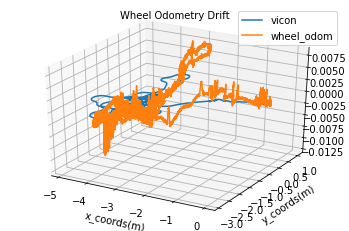

In [25]:
plt.figure(figsize=(15,10))
fs = 10
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(v2[0,:],v2[1,:],v2[2,:],label='vicon')
#plt.plot(v1[0,:],v1[1,:],label='wheel_odom')
ax.plot(v3[0,:],v3[1,:],v3[2,:],label='wheel_odom')
plt.legend(fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.xlabel('x_coords(m)',fontsize=fs)
plt.ylabel('y_coords(m)',fontsize=fs)
plt.title('Wheel Odometry Drift',fontsize=fs)
# plt.savefig('wheelodom2d.svg',bbox_inches='tight')


In [ ]:
k_x = np.mean(odom_df.iloc[:5,5]) - np.mean(vicon_df.iloc[:5,5])
k_y = np.mean(odom_df.iloc[:5,6]) - np.mean(vicon_df.iloc[:5,6])
k_z = np.mean(odom_df.iloc[:5,7]) - np.mean(vicon_df.iloc[:5,7])


In [ ]:
vicon_df['%time'] < odom_df['%time'][0]

In [ ]:
visual = pd.read_csv('predictedxandq.txt',delimiter=' ')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
endpoint = -1
sigma_vis = 20
# ax.plot(filt.gaussian_filter1d(visual.iloc[:endpoint,2],sigma_vis),filt.gaussian_filter1d(visual.iloc[:endpoint,3],sigma_vis),filt.gaussian_filter1d(visual.iloc[:endpoint,4],sigma_vis), c='b')
ax.plot(odom_df.iloc[:endpoint,5]-k_x,odom_df.iloc[:endpoint,6]-k_y,odom_df.iloc[:endpoint,7]-k_z)
sigma = 5
ax.plot(filt.gaussian_filter1d(vicon_df.iloc[:endpoint,5],sigma),filt.gaussian_filter1d(vicon_df.iloc[:endpoint,6],sigma),filt.gaussian_filter1d(vicon_df.iloc[:endpoint,7],sigma),c='r')

plt.show()

In [ ]:

    
print(new_odom_df['%time'][25]-new_odom_df['%time'][0])
print(new_odom_df.iloc[3025,5:8])
print(new_odom_df.iloc[3000,5:8])
new_odom_df.head()


new_odom_indices = [3035,3014]
vicon_indices = [28000,27800]

x1 = (new_odom_df.iloc[3035,5:8]-new_odom_df.iloc[3014,5:8]).values
x2 = (vicon_df.iloc[28000,5:8] - vicon_df.iloc[27800,5:8]).values
# print((new_odom_df.iloc[3035,5:8]-new_odom_df.iloc[3014,5:8]).values)
# print((vicon_df.iloc[28000,5:8] - vicon_df.iloc[27800,5:8]).values )
x1 = np.array(x1,dtype= np.double)
x2 = np.array(x2,dtype= np.double)
R = get_rotation_matrix(np.array(x1),np.array(x2))
print(R)


R*x1

In [ ]:
fig = plt.figure()

endpoint = -1
sigma_vis = 20
v1 = odom_df.iloc[:,5:8].values
v2 = vicon_df.iloc[:,5:8].values
R = get_rotation_matrix(v1[0],v2[0])
# ax.plot(filt.gaussian_filter1d(visual.iloc[:endpoint,2],sigma_vis),filt.gaussian_filter1d(visual.iloc[:endpoint,3],sigma_vis),filt.gaussian_filter1d(visual.iloc[:endpoint,4],sigma_vis), c='b')
v1 = [np.array(R*np.matrix(a).T).squeeze() for a in v1]
v2 = vicon_df.iloc[:,5:8].values

v1 = np.squeeze(v1,axis=-1)
ax = fig.add_subplot(111, projection='3d')
ax.plot(v1[:,0],v1[:,1],v1[:,2])
ax.plot(v2[:,0],v2[:,1],v2[:,2])
sigma = 5



print(R)
plt.show()

print(v1[0])

print(v2[0])

In [ ]:
new_odom_df.tail()

In [ ]:
print(1/np.sqrt(3))

